In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [3]:
# Load dataset
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
# To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [8]:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

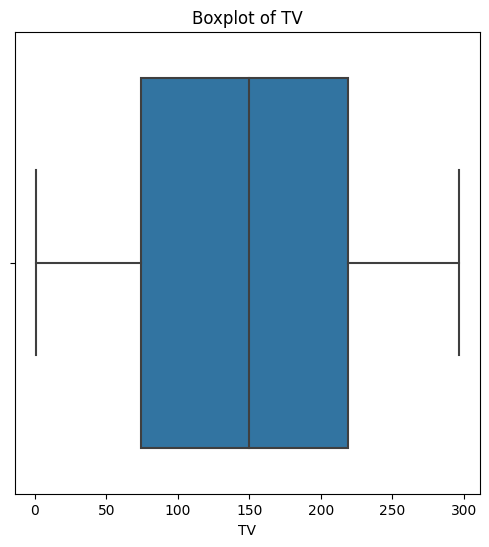

In [17]:
#Data Visualization
plt.figure(figsize=(6,6))
sns.boxplot(x=df.TV)
plt.title("Boxplot of TV")
plt.show()

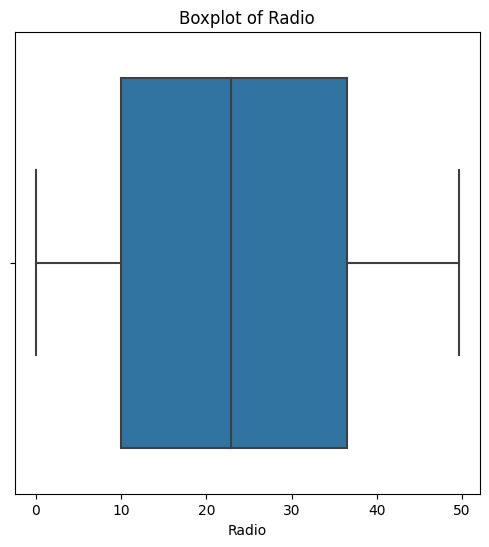

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df.Radio)
plt.title("Boxplot of Radio")
plt.show()

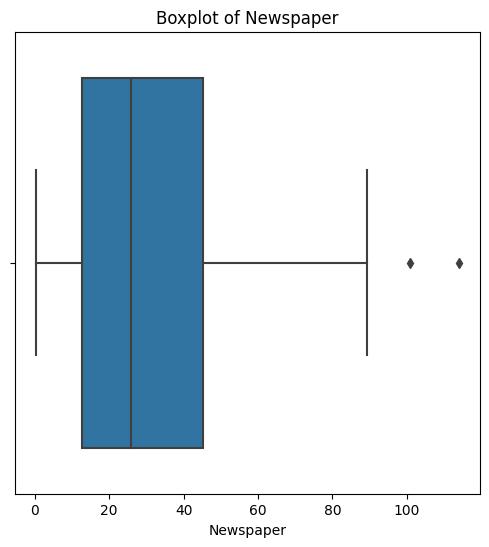

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df.Newspaper)
plt.title("Boxplot of Newspaper")
plt.show()

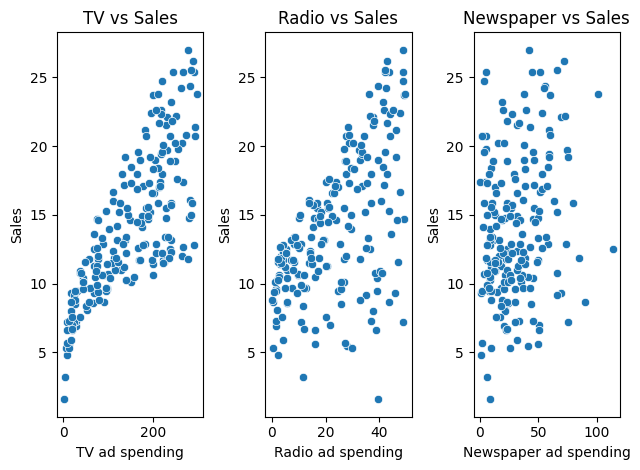

In [22]:
#creating a scatter plot to visualise how the dependent and independent variables are related
plt.subplot(1,3,1)
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.title("TV vs Sales")
plt.xlabel("TV ad spending")
plt.ylabel("Sales")

plt.subplot(1,3,2)
sns.scatterplot(x=df['Radio'],y=df['Sales'])
plt.title("Radio vs Sales")
plt.xlabel("Radio ad spending")
plt.ylabel("Sales")

plt.subplot(1,3,3)
sns.scatterplot(x=df['Newspaper'],y=df['Sales'])
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper ad spending")
plt.ylabel("Sales")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [23]:
# Model Preparation

X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [27]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
ypred=regressor.predict(X_test)

In [30]:
r2Score=r2_score(ypred,y_test)
print(r2Score)

0.8508059163716846


In [31]:
mse = mean_squared_error(y_test, ypred)
print(mse)

2.9024168803904797


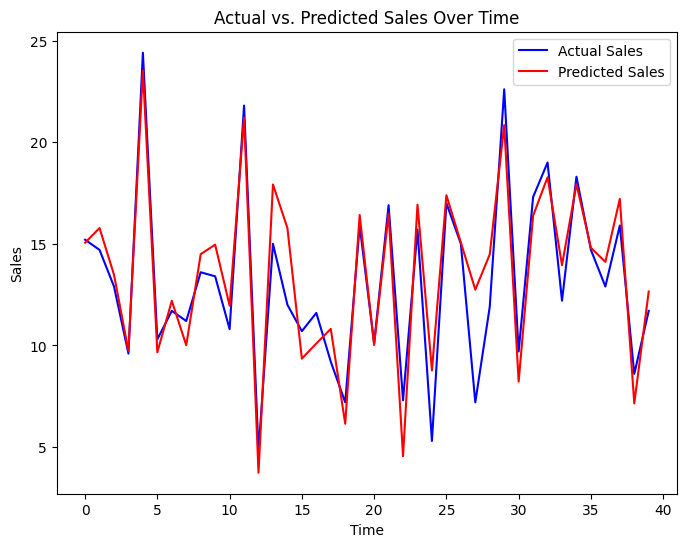

In [32]:
#Plot actual vs. predicted sales over time
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(ypred)), ypred, color='red', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()